In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("cost_revenue_dirty.csv")

### Cleaning Data
Drop unneeded columns <br/>
Removing rows with zero grossing as data may be incomplete

In [4]:
df.drop(df.columns[[0, 1, 2, 4]], inplace = True, axis = 1)

In [5]:
df.head(5)

,Production Budget,Worldwide Gross
0,"$460,000,000","$2,265,159,552"
1,"$400,000,000","$2,794,731,755"
2,"$379,000,000","$1,045,713,802"
3,"$365,000,000","$1,395,316,979"
4,"$340,000,000",$0


In [6]:
df.columns = ["budget", "gross"]

In [7]:
df["budget"] = df["budget"].str.replace("$", "", regex = False).replace(",", "", regex = True)
df["gross"] = df["gross"].str.replace("$", "", regex = False).replace(",", "", regex = True)

In [8]:
df.head(5)

,budget,gross
0,460000000,2265159552
1,400000000,2794731755
2,379000000,1045713802
3,365000000,1395316979
4,340000000,0


In [9]:
df.dtypes

budget    object
gross     object
dtype: object

In [10]:
df = df.astype(float)

In [11]:
df.head(5)

,budget,gross
0,460000000.0,2.265160e+09
1,400000000.0,2.794732e+09
2,379000000.0,1.045714e+09
3,365000000.0,1.395317e+09
4,340000000.0,0.000000e+00


In [12]:
df = df[df["gross"] != 0]

In [14]:
df.head(5)

,budget,gross
0,460000000.0,2.265160e+09
1,400000000.0,2.794732e+09
2,379000000.0,1.045714e+09
3,365000000.0,1.395317e+09
5,306000000.0,2.064616e+09


In [15]:
df.describe()

,budget,gross
count,5.954000e+03,5.954000e+03
mean,3.365328e+07,9.838368e+07
std,4.353382e+07,1.882676e+08
min,1.100000e+03,1.700000e+01
25%,6.000000e+06,6.605357e+06
50%,1.800000e+07,3.204126e+07
75%,4.200000e+07,1.030365e+08
max,4.600000e+08,2.923706e+09


In [16]:
df.reset_index()
df.drop(0)
df.head(5)

,budget,gross
0,460000000.0,2.265160e+09
1,400000000.0,2.794732e+09
2,379000000.0,1.045714e+09
3,365000000.0,1.395317e+09
5,306000000.0,2.064616e+09


In [17]:
df.columns = ["budget_usd", "gross_usd"]

In [18]:
df.head(5)

,budget_usd,gross_usd
0,460000000.0,2.265160e+09
1,400000000.0,2.794732e+09
2,379000000.0,1.045714e+09
3,365000000.0,1.395317e+09
5,306000000.0,2.064616e+09


### Exploration, Visualisation and Further Cleaning

In [19]:
import matplotlib.pyplot as plt

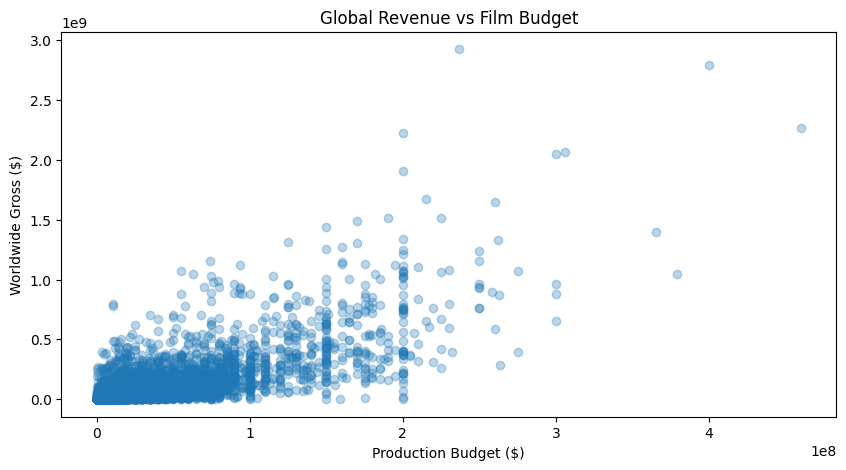

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(df["budget_usd"], df["gross_usd"], alpha=0.3)
plt.title("Global Revenue vs Film Budget")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.show()

### Building the Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
X, y = df[["budget_usd"]], df[["gross_usd"]]
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

Slope coefficient

In [42]:
regression.coef_

array([[3.19688475]])

Intercept

In [43]:
regression.intercept_

array([-9201976.00126101])

## Plotting the regression line

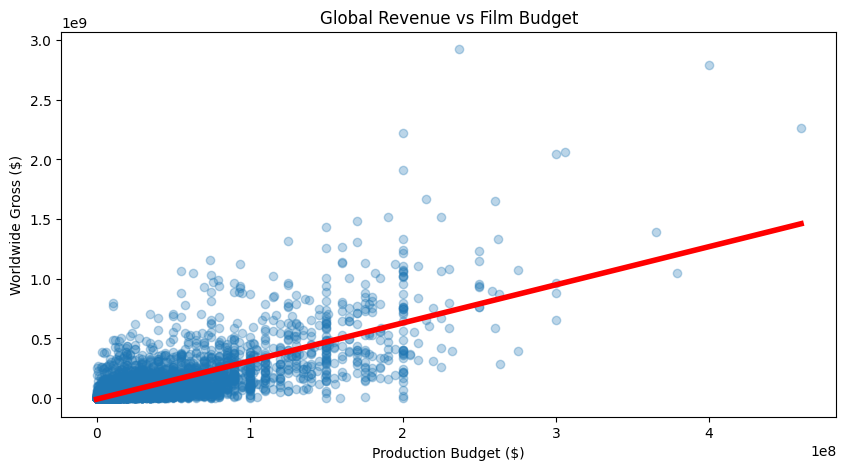

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(df["budget_usd"], df["gross_usd"], alpha=0.3)
plt.plot(X, regression.predict(X), color = "red", linewidth = 4)
plt.title("Global Revenue vs Film Budget")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.show()

Goodness of Fit

In [45]:
regression.score(X, y)

0.5464578317011112